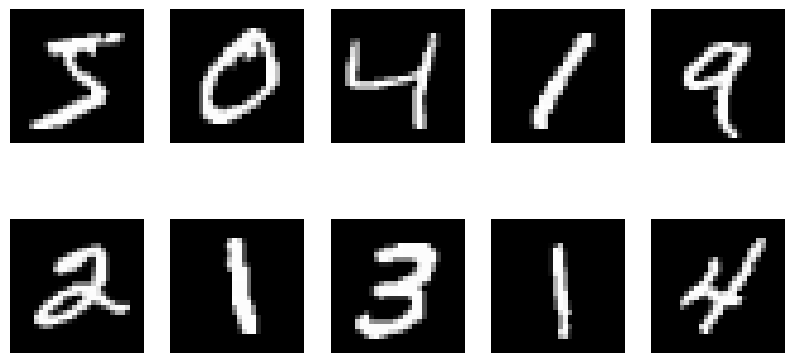

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# # Load dataset MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# # Hiển thị một vài ảnh trong dataset
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis("off")
plt.show()

In [10]:
# Chuẩn hóa dữ liệu (biến đổi pixel từ 0-255 về 0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Thêm chiều thứ 4 để phù hợp với CNN (1 kênh màu - grayscale)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Chuyển label thành dạng one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

c:\Users\gnud1\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 28ms/step - accuracy: 0.8463 - loss: 0.4799 - val_accuracy: 0.9844 - val_loss: 0.0459
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9812 - loss: 0.0655 - val_accuracy: 0.9877 - val_loss: 0.0361
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9872 - loss: 0.0447 - val_accuracy: 0.9896 - val_loss: 0.0266
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9894 - loss: 0.0342 - val_accuracy: 0.9918 - val_loss: 0.0257
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9903 - loss: 0.0314 - val_accuracy: 0.9925 - val_loss: 0.0244
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9938 - loss: 0.0220 - val_accuracy: 0.9911 - val_loss: 0.0264
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9936 - loss: 0.0200 - val_accuracy: 0.9925 - val_loss: 0.0267
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9952 - loss: 0.0159 - 

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Độ chính xác trên tập test: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9918 - loss: 0.0320
Độ chính xác trên tập test: 0.9936


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


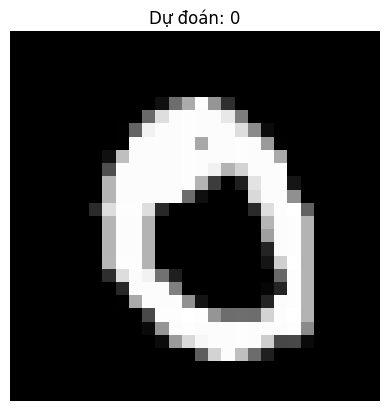

In [15]:
import random

index = random.randint(0, len(x_test) - 1) 
image = x_test[index]

# Dự đoán
prediction = model.predict(np.expand_dims(image, axis=0))
predicted_label = np.argmax(prediction)

# Hiển thị kết quả
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Dự đoán: {predicted_label}")
plt.axis("off")
plt.show()

In [16]:
model.save("mnist_cnn.h5")